In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='age'>

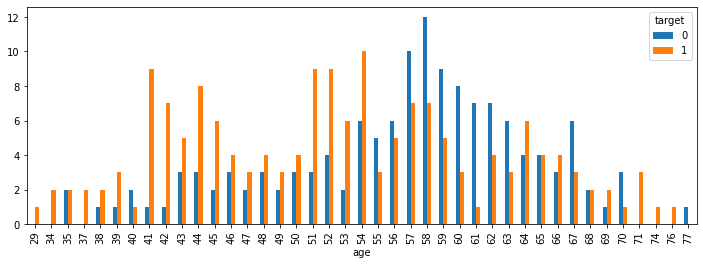

In [7]:
pd.crosstab(heart.age, heart.target).plot.bar(figsize=(12,4))

<AxesSubplot:xlabel='target', ylabel='count'>

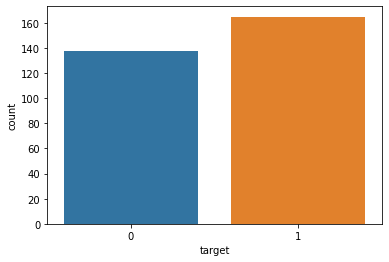

In [8]:
sns.countplot(heart.target)

In [9]:
X = heart.drop('target', axis=1)
y = heart[['target']]

In [10]:
X.shape, y.shape

((303, 13), (303, 1))

In [100]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.05, random_state=4)

In [101]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((287, 13), (287, 1), (16, 13), (16, 1))

In [58]:
def check_model(model, train_X, test_X, train_y, test_y, fit=True):
    
    if fit:
        model.fit(train_X, train_y)
    
    print('Training Accuracy: {}'.format(model.score(train_X, train_y)))
    print('Testung Accuracy: {}'.format(model.score(test_X, test_y)))
    print('*'*50)
    print('Train Confusion Matrix: \n{}'.format(confusion_matrix(train_y, model.predict(train_X))))
    print('Test Confusion Matrix: \n{}'.format(confusion_matrix(test_y, model.predict(test_X))))
    print('*'*50)
    print('Train Classification Report \n{}'.format(classification_report(train_y, model.predict(train_X))))
    print('Test Classification Report: \n{}'.format(classification_report(test_y, model.predict(test_X))))

In [59]:
dt_clf = DecisionTreeClassifier()

In [60]:
check_model(dt_clf, train_X, test_X, train_y, test_y)

Training Accuracy: 1.0
Testung Accuracy: 0.7032967032967034
**************************************************
Train Confusion Matrix: 
[[100   0]
 [  0 112]]
Test Confusion Matrix: 
[[25 13]
 [14 39]]
**************************************************
Train Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       112

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        38
           1       0.75      0.74      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



In [61]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [5, 7, 10, 13, 15],
    'min_samples_leaf': [3, 5, 7, 10]
}

gridCV = GridSearchCV(dt_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=4, return_train_score=True)

gridCV.fit(train_X, train_y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [5, 7, 10, 13, 15]},
             return_train_score=True, verbose=2)

In [62]:
gridCV.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 7}

In [63]:
gridCV.best_score_

0.8443326626425218

In [64]:
cv_res = pd.DataFrame(gridCV.cv_results_['params'])
cv_res['split0_test_score'] = gridCV.cv_results_['split0_test_score']
cv_res['split1_test_score'] = gridCV.cv_results_['split1_test_score']
cv_res['split2_test_score'] = gridCV.cv_results_['split2_test_score']
cv_res['split0_train_score'] = gridCV.cv_results_['split0_train_score']
cv_res['split1_train_score'] = gridCV.cv_results_['split1_train_score']
cv_res['split2_train_score'] = gridCV.cv_results_['split2_train_score']


In [65]:
cv_res

,max_depth,min_samples_leaf,min_samples_split,split0_test_score,split1_test_score,split2_test_score,split0_train_score,split1_train_score,split2_train_score
0,5.0,3,5,0.774648,0.816901,0.857143,0.936170,0.929078,0.880282
1,5.0,3,7,0.774648,0.816901,0.857143,0.914894,0.929078,0.880282
2,5.0,3,10,0.802817,0.830986,0.857143,0.907801,0.929078,0.880282
3,5.0,3,13,0.802817,0.774648,0.857143,0.907801,0.907801,0.880282
4,5.0,3,15,0.760563,0.774648,0.828571,0.893617,0.900709,0.859155
...,...,...,...,...,...,...,...,...,...
75,NaN,10,5,0.873239,0.802817,0.842857,0.843972,0.865248,0.830986
76,NaN,10,7,0.873239,0.802817,0.842857,0.843972,0.865248,0.830986
77,NaN,10,10,0.873239,0.802817,0.842857,0.843972,0.865248,0.830986
78,NaN,10,13,0.873239,0.802817,0.842857,0.843972,0.865248,0.830986


In [66]:
best_dt = gridCV.best_estimator_

In [67]:
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=7)

In [68]:
check_model(best_dt, train_X, test_X, train_y, test_y, fit=False)

Training Accuracy: 0.8867924528301887
Testung Accuracy: 0.7362637362637363
**************************************************
Train Confusion Matrix: 
[[91  9]
 [15 97]]
Test Confusion Matrix: 
[[28 10]
 [14 39]]
**************************************************
Train Classification Report 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       100
           1       0.92      0.87      0.89       112

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



In [69]:
rf_clf = RandomForestClassifier()

In [70]:
check_model(rf_clf, train_X, test_X, train_y, test_y)

Training Accuracy: 1.0
Testung Accuracy: 0.8351648351648352
**************************************************
Train Confusion Matrix: 
[[100   0]
 [  0 112]]
Test Confusion Matrix: 
[[30  8]
 [ 7 46]]
**************************************************
Train Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       112

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.85      0.87      0.86        53

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [72]:
heart.shape

(303, 14)

In [102]:
param_grid = {
    'n_estimators': [10, 50, 150, 200],
    'max_samples': [80, 120, 160, 200, 240, 280],
    'max_features': [2,4,8,12],
}

In [103]:
gridCV = GridSearchCV(rf_clf, param_grid=param_grid, cv=5, verbose=2)

In [104]:
gridCV.fit(train_X,train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ....max_features=2, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=2, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=2, max_samples=80, n_estimators=150; total time=   0.1s
[CV] END ...max_features=2, max_samples=80, n_e

[CV] END ....max_features=4, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=4, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=4, max_samples=80, n_estimators=150; total time=   0.2s
[CV] END ...max_features=4, max_samples=80, n_estimators=150; total time=   0.2s
[CV] END ...max_features=4, max_samples=80, n_estimators=150; total time=   0.2s
[CV] END ...max_features=4, 

[CV] END ..max_features=4, max_samples=280, n_estimators=200; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ....max_features=8, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=8, max_samples=80, n_estimators=150; total time=   0.1s
[CV] END ...max_features=8, 

[CV] END ...max_features=12, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=10; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ...max_features=12, max_samples=80, n_estimators=50; total time=   0.1s
[CV] END ...max_features=12, max_samples=80, n_estimators=50; total time=   0.0s
[CV] END ..max_features=12, max_samples=80, n_estimators=150; total time=   0.2s
[CV] END ..max_features=12, max_samples=80, n_estimators=150; total time=   0.3s
[CV] END ..max_features=12, max_samples=80, n_estimators=150; total time=   0.1s
[CV] END ..max_features=12, max_samples=80, n_estimators=150; total time=   0.2s
[CV] END ..max_features=12, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 8, 12],
                         'max_samples': [80, 120, 160, 200, 240, 280],
                         'n_estimators': [10, 50, 150, 200]},
             verbose=2)

In [105]:
gridCV.best_score_

0.8399879007864488

In [106]:
gridCV.best_params_

{'max_features': 4, 'max_samples': 80, 'n_estimators': 150}

In [107]:
best_rf = gridCV.best_estimator_

In [108]:
check_model(best_rf, train_X, test_X, train_y, test_y, fit=False)

Training Accuracy: 0.9407665505226481
Testung Accuracy: 1.0
**************************************************
Train Confusion Matrix: 
[[120  12]
 [  5 150]]
Test Confusion Matrix: 
[[ 6  0]
 [ 0 10]]
**************************************************
Train Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       132
           1       0.93      0.97      0.95       155

    accuracy                           0.94       287
   macro avg       0.94      0.94      0.94       287
weighted avg       0.94      0.94      0.94       287

Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

